In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila

     |████████████████████████████████| 1.7 MB 22.6 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 557 kB 30.5 MB/s eta 0:00:01
     |████████████████████████████████| 395 kB 37.5 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 26.2 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 13.2 MB/s eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbdev 1.1.23 requires nbconvert<6, but you have nbconvert 6.4.1 which is incompatible.
Enabling: voila
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      voila 0.3.1 OK


In [3]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [4]:
path = untar_data(URLs.MNIST)

In [5]:
path.ls()

(#2) [Path('/storage/data/mnist_png/training'),Path('/storage/data/mnist_png/testing')]

In [6]:
train_path = (path/'training').ls().sorted()

In [7]:
train_x = []
train_y = []
train_path

(#10) [Path('/storage/data/mnist_png/training/0'),Path('/storage/data/mnist_png/training/1'),Path('/storage/data/mnist_png/training/2'),Path('/storage/data/mnist_png/training/3'),Path('/storage/data/mnist_png/training/4'),Path('/storage/data/mnist_png/training/5'),Path('/storage/data/mnist_png/training/6'),Path('/storage/data/mnist_png/training/7'),Path('/storage/data/mnist_png/training/8'),Path('/storage/data/mnist_png/training/9')]

In [8]:
for label, label_path in enumerate(train_path):
    imgs = [tensor(Image.open(o)) for o in label_path.ls()]
    train_x += imgs
    train_y += tensor([label]*len(imgs)).unsqueeze(1)

In [9]:
len(train_x), len(train_y)

(60000, 60000)

<AxesSubplot:>

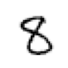

In [10]:
show_image(train_x[53000])

In [11]:
train_x[52000].shape

torch.Size([28, 28])

In [12]:
df = pd.DataFrame(train_x[52000][4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,28,149,203,203,203,100,1,0,0,0,0,0,0
5,0,0,0,0,0,84,253,253,253,253,253,163,0,0,0,0,0,0
6,0,0,0,0,0,128,253,208,103,112,204,235,100,0,0,0,0,0
7,0,0,0,0,0,128,253,51,0,0,16,137,118,0,0,14,31,139
8,0,0,0,0,0,102,253,51,0,0,0,0,69,158,203,243,254,253
9,0,0,0,0,0,89,249,132,106,124,191,254,255,254,254,254,255,197


In [13]:
# convert pixels to values between 0 and 1
train_x = torch.stack(train_x).float()/255

In [14]:
df = pd.DataFrame(train_x[52000][4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.109804,0.584314,0.796078,0.796078,0.796078,0.392157,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.329412,0.992157,0.992157,0.992157,0.992157,0.992157,0.639216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.501961,0.992157,0.815686,0.403922,0.439216,0.800000,0.921569,0.392157,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.501961,0.992157,0.200000,0.000000,0.000000,0.062745,0.537255,0.462745,0.000000,0.000000,0.054902,0.121569,0.545098
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.992157,0.200000,0.000000,0.000000,0.000000,0.000000,0.270588,0.619608,0.796078,0.952941,0.996078,0.992157
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.349020,0.976471,0.517647,0.415686,0.486275,0.749020,0.996078,1.000000,0.996078,0.996078,0.996078,1.000000,0.772549


In [15]:
# flatten image pixel matrix into a single vector
# create dataset
train_x = train_x.view(-1,28*28)
train_dset = list(zip(train_x, train_y))

In [16]:
x, y = train_dset[0]
x.shape, y.shape

(torch.Size([784]), torch.Size([1]))

In [17]:
# perform the same operations for test dataset
test_path = (path/'testing').ls().sorted()
test_x = []
test_y = []

for label, path in enumerate(test_path):
    imgs = [tensor(Image.open(o)) for o in path.ls()]
    test_x += imgs
    test_y += tensor([label]*len(imgs)).unsqueeze(1)
    
test_x = torch.stack(test_x).float()/255
test_x = test_x.view(-1, 28*28)
test_dset = list(zip(test_x, test_y))

In [18]:
train_dl = DataLoader(train_dset, batch_size=256)
testing_dl = DataLoader(test_dset, batch_size=256)
dls = DataLoaders(train_dl, testing_dl)

In [19]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [31]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,10),
    nn.Sigmoid()
)

In [39]:
#learner = Learner(dls, simple_net, opt_func=SGD,loss_func=mnist_loss)
learn = cnn_learner(dls, resnet34, metrics=accuracy)
# redo w/ https://jonathan-sands.com/deep%20learning/fastai/pytorch/vision/classifier/2020/11/15/MNIST.html#The-Fastai-way

AttributeError: 'function' object has no attribute 'fs'

ValueError: not enough values to unpack (expected 2, got 1)

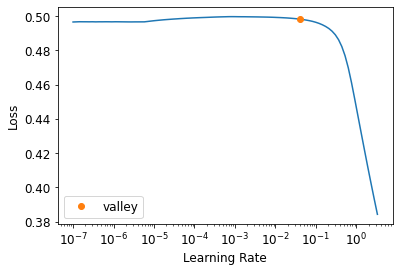

In [37]:
lr_min,lr_steep = learn.lr_find()


In [38]:
learner.fit(45,1)

epoch,train_loss,valid_loss,time
0,0.003720,0.110168,00:02
1,0.002102,0.097734,00:02
2,0.001529,0.087662,00:02
3,0.001430,0.081388,00:02
4,0.001406,0.076734,00:01
5,0.001405,0.072979,00:01
6,0.001411,0.069845,00:01
7,0.001422,0.067123,00:01
8,0.001436,0.064661,00:03
9,0.001452,0.062385,00:07


In [41]:
learner.export(fname='mnist_classifier.pkl')

AttributeError: 'list' object has no attribute 'new_empty'